# Prediction de l'energie des molécules colab version


#### imporation des librairies

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import plotly.express as px
import tensorflow.keras.backend as K

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Définition de la métrique d'évaluation.

In [ ]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
          

#### Création d'un jeu de données d'entrainement et de test  / Scaling.

In [ ]:
path="./drive/MyDrive/kaggle_energy_molecule/"

In [ ]:
df_train = pd.read_csv(path+"process_data_mbtr.csv",sep=";")

In [ ]:
Y = df_train["energy"].values

In [ ]:
to_drop = ["id","Molecule","Molecule_formula","energy"]

In [ ]:
X = df_train.drop(to_drop,axis=1)

In [ ]:
X.shape

(6770, 773)

In [ ]:
df_train.shape

(6770, 777)

### CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
# Librairies et fonctions nécessaires au design des réseaux de neurones
import keras
from keras import layers
from keras import models
from keras.layers import Dense,Conv1D,Conv2D, MaxPooling1D, Flatten, Activation,Dropout
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import regularizers

In [ ]:
scaler_MinMax = preprocessing.MinMaxScaler()#QuantileTransformer(output_distribution="normal",random_state=0)
scaler_MinMax.fit(X.values)

MinMaxScaler()

In [ ]:
X_cnn = X.values#scaler_MinMax.transform(X.values)#

In [ ]:
type_reseau = "conv"
if type_reseau == "conv" :
  X_cnn = X_cnn.reshape(X_cnn.shape[0],X_cnn.shape[1],1)

In [ ]:
X_cnn.shape

(6770, 773, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     X_cnn, Y, test_size=0.05, random_state=42)

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    #plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error ')
    plt.legend()
    plt.grid(True)

In [ ]:

model = Sequential()
choose = "v_4" # choix possible : v_0 à v7
if choose == "v_4" or choose=="best":
  model.add(Conv1D(64, 3, activation="relu", input_shape=(773, 1)))
  model.add(Conv1D(128,3, activation="relu"))
  model.add(Conv1D(256,3, activation="relu"))
  model.add(Flatten())
  model.add(Dense(500,activation="relu"))
elif choose == "v_1" :
  model.add(Conv1D(32, 3, activation="relu", input_shape=(773, 1)))
  model.add(Conv1D(64, 3, activation="relu"))
  model.add(Conv1D(128,3, activation="relu"))
  model.add(Conv1D(256,3, activation="relu"))
  model.add(Flatten())
  model.add(Dense(800,activation="relu",kernel_regularizer=regularizers.l2(0.5)))
elif choose =="v_2" :
  #model.add(Flatten())
  model.add(Dense(3024, activation="elu"))
  model.add(Dense(1024, activation="elu"))
  model.add(Dense(800,activation="relu"))
  model.add(Dense(500,activation="relu"))
  model.add(Dense(124,activation="relu"))
elif choose =="v_3" :Dropout(.2,
  model.add(Dense(3024, activation="relu"))
  model.add(Dropout(0.1))
  model.add(Dense(1024, activation="relu"))
  model.add(Dense(800,activation="relu"))
  model.add(Dense(500,activation="relu"))
  model.add(Dense(124,activation="relu"))

else :
  raise Exception("Ce choix a été impléménté par sebastien")




model.add(Dense(1,activation = "linear")) #optimizer=
mcp_save = ModelCheckpoint('fnn_2.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=100, verbose=1, mode='min')
model.compile(loss=root_mean_squared_error,optimizer=optimizers.Adam(learning_rate=3e-4) ,metrics=["mse",root_mean_squared_error])
early_stop = keras.callbacks.EarlyStopping(monitor="val_loss",patience=300)
history = model.fit(X_train, y_train,validation_split = 0.05,callbacks = [ mcp_save, reduce_lr_loss,early_stop],batch_size=32,epochs=2500)#,callbacks=[early_stop])

In [ ]:
from google.colab import files
files.download('fnn_2.hdf5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

model.save('model.hdf5')

In [ ]:
files.download('model.hdf5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mse,root_mean_squared_error,val_loss,val_mse,val_root_mean_squared_error,lr,epoch
2495,0.145602,0.015751,0.121244,0.190999,0.028003,0.160522,0.000075,2495
2496,0.146646,0.015834,0.122234,0.150149,0.016149,0.119029,0.000075,2496
2497,0.151667,0.017348,0.127433,0.161317,0.019049,0.131401,0.000075,2497
2498,0.145208,0.015503,0.120837,0.169937,0.021646,0.141084,0.000075,2498
2499,0.151718,0.017431,0.127402,0.155768,0.017617,0.125232,0.000075,2499


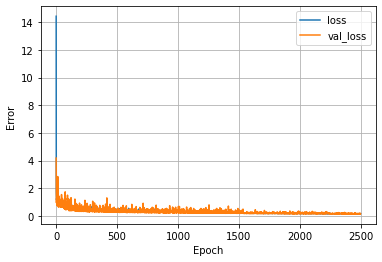

In [ ]:
plot_loss(history)

In [ ]:
modele = m_best

In [ ]:
X_val, X_test_r, y_val, y_test_r = train_test_split(
...     X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
m_best = tf.keras.models.load_model("fnn_2.hdf5",custom_objects = {"root_mean_squared_error": root_mean_squared_error})

In [ ]:
# Reprise d'entrainement.
mcp_save = ModelCheckpoint('fnn_retrain.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=150, verbose=1, mode='min')
early_stop = keras.callbacks.EarlyStopping(monitor="val_loss",patience=300)
history = m_best.fit(X_train, y_train,validation_data = (X_val,y_val),callbacks = [ mcp_save, reduce_lr_loss,early_stop],batch_size=1000,epochs=2500)

## Submission

In [ ]:
y_pred_nn = m_best.predict(X_test).flatten()

In [ ]:
rmse(y_pred_nn,y_test)

0.0782587547312366

In [ ]:
px.scatter(x=list(y_pred_nn),y=list(y_test))

In [ ]:
px.scatter(x=list(y_test),y=list(np.sqrt((y_pred_nn-y_test)**2)))

In [ ]:
df_test= pd.read_csv(path+"process_data_mbtr_for_submit_test.csv",sep=";")

In [ ]:
X_submit = df_test.drop(["id","Molecule","Molecule_formula"],axis=1)
#X_submit_ = scaler_MinMax.transform(X_submit.values)
predicted = m_best.predict(X_submit).flatten()
df_pred = pd.DataFrame({"id":df_test["id"].values,"predicted":predicted})

In [ ]:
df_pred.to_csv("sub9_mbtr_model_end.csv",header=True,encoding="utf-8-sig",sep=",",index=False)